# Customer Churn Prediction LP 2

## __1. Business Understanding__

### 1.0 Project Description
__Problem Statement:__

This project focuses on Customer Churn Prediction with the goal of utilizing machine learning classification models to analyze customer behavior and forecast churn. The objective is to enhance profitability and customer retention for the company. By employing supervised learning techniques, the project aims to develop reliable models capable of accurately categorizing customers into churn or non-churn segments using diverse data attributes like transaction history, demographics, and interaction patterns. 

__Goal:__

The overarching aim is to equip businesses with actionable insights to preemptively detect and address churn risks, thereby nurturing enduring customer relationships and optimizing revenue margins.








### 1.1 Scope of Work
The scope of the project encompasses comprehensive phases including data collection and preprocessing, feature engineering, model development utilizing various classification algorithms, rigorous evaluation, establishment of monitoring mechanisms for real-time performance tracking, thorough documentation and knowledge transfer, rigorous quality assurance and testing procedures, and active stakeholder communication and collaboration throughout the project lifecycle. The project aims to deliver a robust Customer Churn Prediction System that enables businesses to proactively identify and mitigate churn risks, optimize customer retention strategies, and drive sustained profitability and growth.

### __2. Data Understanding Analysis__


### 2.0 Loading of Libraries

In [2]:
# Data analysis and manipulation packages


# For data manipulation
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter
#For statistical analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# for database connection
import pyodbc
from dotenv import dotenv_values
import os

# Filter warnings
import warnings
warnings.filterwarnings("ignore")
print("loading complete")



loading complete


### __2.2 Loading and Inspection of Data__

__2.2.1 Loading Data from SQL Server__

In [3]:
##Loading environment variables from .env files 
environment_variables = dotenv_values(".env")

##Getting values of the credentials set in the .env file
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

##Constructing the connection string
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
connection = pyodbc.connect(connection_string)

In [5]:
##sql query to retrieve data from the table LP1_startup_2020
query1="SELECT * FROM dbo.LP2_Telco_churn_first_3000"

##execute the sql query and load into pandas DataFrame
data1 = pd.read_sql(query1,connection)


 __2.2.2 Loading CSV Files__

In [6]:
data2 = pd.read_csv(r"C:\Users\USER\Documents\Azubi Africa Class\Classification Project LP2\Classification-Project-LP2\Data\LP2_Telco-churn-second-2000.csv")



### 2.3 Exploratory Data Analysis

__2.3.1 Data1__

In [7]:
# Overview of data1
data1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [8]:
# Number of columns and rows in data1
print (data1.shape)
print(f"There are {data1.shape[0]} rows, and {data1.shape[1]} columns")

(3000, 21)
There are 3000 rows, and 21 columns


In [9]:
# check info for data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [10]:
# Describe data1
data1.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [11]:
# checking for duplicates
print("There are ",data1.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [12]:
# Checking for missing values
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

__2.3.2 Data2__

In [13]:
# Overview of data1
data2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [14]:
# Number of columns and rows in data1
print (data2.shape)
print(f"There are {data2.shape[0]} rows, and {data2.shape[1]} columns")

(2043, 21)
There are 2043 rows, and 21 columns


In [15]:
# check info for data2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [16]:
# Describe data1
data1.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [17]:
# checking for duplicates
print("There are ",data2.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [18]:
# Checking for missing values
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

### 2.4 Concatenation of Datasets

In [19]:
def concat_dataframes(data1, data2):
    """
    Concatenates two dataframes along the row axis.

    Parameters:
    data1 (pandas.DataFrame): The first dataframe to concatenate.
    data2 (pandas.DataFrame): The second dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    data1 = data1.rename(columns= {'customerID':'customerid', 'gender':'gender', 'SeniorCitizen':'seniorcitizen', 'Partner':'partner', 'Dependents':'dependents',
       'tenure':'tenure', 'PhoneService':'phoneservice', 'MultipleLines':'multiplelines', 'InternetService':'internetservice',
       'OnlineSecurity':'onlinesecurity', 'OnlineBackup':'onlinebackup', 'DeviceProtection':'deviceprotection', 'TechSupport':'techsupport',
       'StreamingTV':'streamingtv', 'StreamingMovies':'streamingmovies', 'Contract':'contract', 'PaperlessBilling':'paperlessbilling',
       'PaymentMethod':'paymentmethod', 'MonthlyCharges':'monthlycharges', 'TotalCharges':'totalcharges', 'Churn':'churn'})
    
    data2 = data2.rename(columns={'customerID':'customerid', 'gender':'gender', 'SeniorCitizen':'seniorcitizen', 'Partner':'partner', 'Dependents':'dependents',
       'tenure':'tenure', 'PhoneService':'phoneservice', 'MultipleLines':'multiplelines', 'InternetService':'internetservice',
       'OnlineSecurity':'onlinesecurity', 'OnlineBackup':'onlinebackup', 'DeviceProtection':'deviceprotection', 'TechSupport':'techsupport',
       'StreamingTV':'streamingtv', 'StreamingMovies':'streamingmovies', 'Contract':'contract', 'PaperlessBilling':'paperlessbilling',
       'PaymentMethod':'paymentmethod', 'MonthlyCharges':'monthlycharges', 'TotalCharges':'totalcharges', 'Churn':'churn'})
    
    # Concatenate dataframes along the row axis
    return pd.concat([data1, data2]).reset_index(drop=True)
    return result

In [20]:
## combined dataset (df)
df = concat_dataframes(data1,data2)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### 2.4 Exploratory Data Analysis ###

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [22]:
# check columns in the df
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [34]:
# check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
monthlycharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
totalcharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [26]:
# Checking for missing values
df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

In [27]:
# checking for duplicates
print("There are ",df.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


__2.4.1 Issues Observed in the Data__

1. Total charge column needs to be converted from string to numeric. 
2. Totalcharge and churn columns have 5 and 1 missing values respectively.  
3. The features are not on the same scale and this is more profound on totalcharge feature.
4. The dataset has a sharp positive skewness.  

__2.5 Data Cleaning__

In [31]:
# convert totalcharge column to numeric 
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


__2.6 Univariate Analysis__

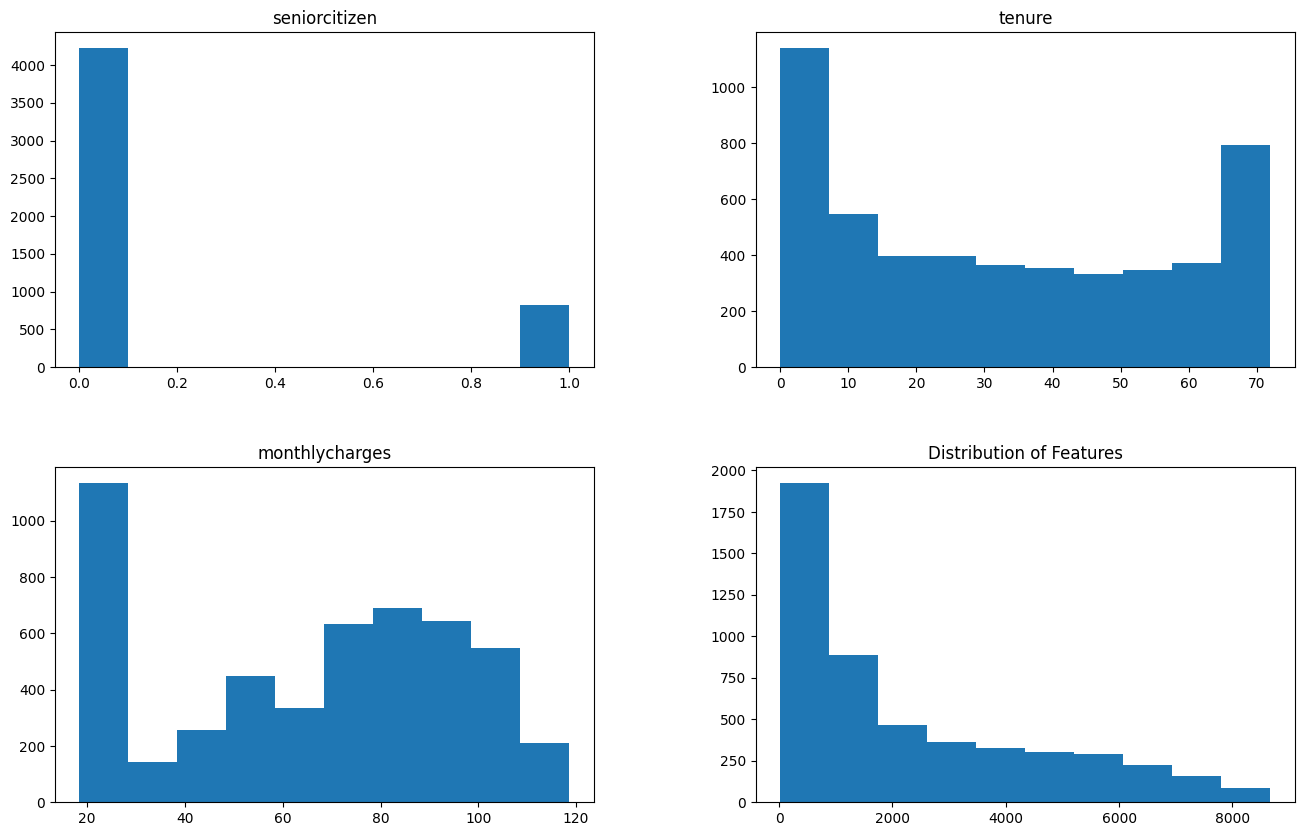

In [43]:
df.hist(figsize=(16,10), grid=False)
plt.title("Distribution of Features")
plt.show()

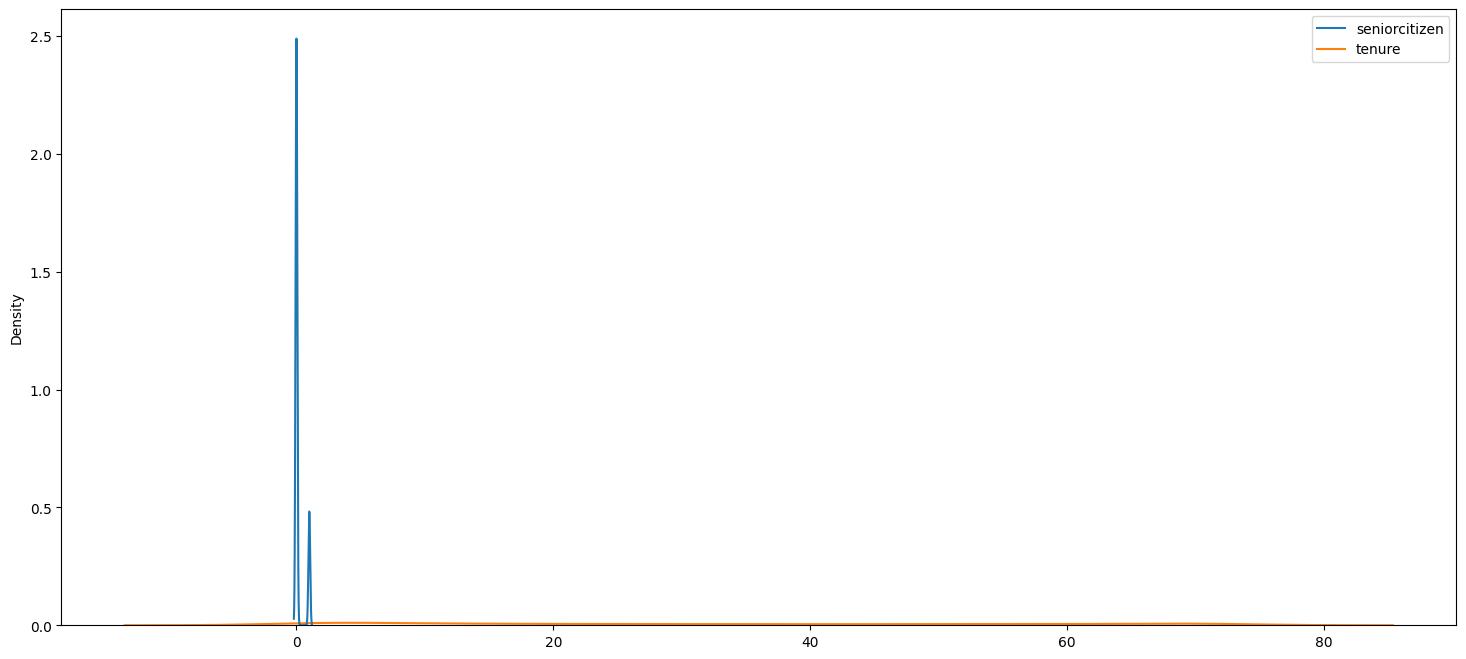

In [51]:
# Density Distribution
plt.figure(figsize=(18,8))
sns.kdeplot(data=df.drop(['totalcharges','monthlycharges'], axis=1))
plt.show()